# Intro Analysis

In [1]:
# Basic packages
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import math
import netCDF4 as nc

# DateTime packages
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import time
import matplotlib.dates as mdates

# Stats packages
import scipy
import bottleneck as bn
import PyCO2SYS as pyco2
import gsw
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns

# Logistical packages
import requests
from importlib import reload
import warnings
warnings.filterwarnings('ignore')

In [2]:
%cd '/Users/akbaskind/Documents/Python Scripts/phyto'
%run PLT.py

/Users/akbaskind/Documents/Python Scripts/phyto


# Get Data

In [111]:
#The scope is always look like this so we did not need to change anything

import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

scope = [
   'https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

# Name of our Service Account Key
google_key_file = 'servicecredentials.json'
credentials = ServiceAccountCredentials.from_json_keyfile_name(google_key_file, scope)
gc = gspread.authorize(credentials)

# Spreadsheet key
spreadsheet_key = '1uLRAvFDsTSfS-c45DiG-W6VMa8I1J7XD1O-pJA4fp10'

# Worksheet keys
wks_hydrocat620 = 'Hydrocat 620'
wks_hydrocat720 = 'Hydrocat 720'
wks_MV = 'MV'
wks_QP = 'QP'

#Opening the worksheet by using Worksheet ID
workbook = gc.open_by_key(spreadsheet_key)

## HYDROCAT 620
#Selecting which sheet to pulling the data
sheet = workbook.worksheet(wks_hydrocat620)
values = sheet.get_all_values()
hydrocat620 = pd.DataFrame(values[1:], columns = values[0])


## HYDROCAT 720
#Selecting which sheet to pulling the data
sheet = workbook.worksheet(wks_hydrocat720)
values = sheet.get_all_values()
hydrocat720 = pd.DataFrame(values[1:], columns = values[0])

## MV
#Selecting which sheet to pulling the data
sheet = workbook.worksheet(wks_MV)
values = sheet.get_all_values()
MV = pd.DataFrame(values[1:], columns = values[0])

## QP
#Selecting which sheet to pulling the data
sheet = workbook.worksheet(wks_QP)
values = sheet.get_all_values()
QP = pd.DataFrame(values[1:], columns = values[0])

In [112]:
for k in hydrocat620.keys():
    if k == 'DateTime' or k == 'time':
        hydrocat620[k] = pd.to_datetime(hydrocat620[k])
    else:
        hydrocat620[k] = pd.to_numeric(hydrocat620[k])

for k in hydrocat720.keys():
    if k == 'DateTime' or k == 'time':
        hydrocat720[k] = pd.to_datetime(hydrocat720[k])
    else:
        hydrocat720[k] = pd.to_numeric(hydrocat720[k])
        
for k in QP.keys():
    if k == 'DateTime' or k == 'time':
        QP[k] = pd.to_datetime(QP[k])
    else:
        QP[k] = pd.to_numeric(QP[k])
        
for k in MV.keys():
    if k == 'DateTime' or k == 'time':
        MV[k] = pd.to_datetime(MV[k])
    else:
        MV[k] = pd.to_numeric(MV[k])

In [5]:
labdf = PLT.get_lab_samples('https://docs.google.com/spreadsheets/d/17FFbtUuhUS4UtxB-OjKIP2wCYJoEAmaW6VaHQPcup9U/edit#gid=0.', 'Sheet1')

In [12]:
labGB = labdf.where(labdf['Location']== 'GB').dropna()
labPLT = labdf.where(labdf['Location']== 'PLT').dropna()
labGB = labGB.reset_index(drop=True)
labPLT = labPLT.reset_index(drop=True)

# Color formatting

In [6]:
pink = '#ff6289'
purple = '#C79FEF'
blue = '#82e9ff'
green = '#C1F80A'

# Greens
caribbean_green = '#00cc99'
emerald = '#319177'
crayola_green = '#1cac78'
jade = '#00a86b'
kelly = '#4cbb17'
yellowgreen = '#9acd32'

# Blues
french_sky_blue = '#77b5fe'
opal = '#a8c3bc'
baby_blue = '#89cff0'
tiffany_blue = '#0abab5'
cornflower = '#6495ed'

# Pinks
hollywood_cerise = '#f400a1'
baker_miller = '#ff91af'
wild_strawberry = '#ff43a4'

# Purples
iris = '#5a4fcf'
orchid = '#9932cc'
amethyst = '#9966cc'
wisteria = '#c9a0dc'

# Oranges
neon_carrot = '#ffa343'
gamboge = '#e49b0f'
carrot = '#ed9121'

# Yellows
sunglow = '#ffcc33'
bitter_lemon = '#cae00d'
pantone_yellow = '#fedf00'

# Reds
candy_apple = '#e2062c'
carmine = '#eb4c42'
coquelicot = '#ff3800'

In [7]:
clr_hydro620 = caribbean_green

clr_hydro720 = cornflower

clr_MV = baker_miller

clr_QP = pantone_yellow

clr_PLT = wisteria

clr_GB = neon_carrot

# Basic time series plot

In [13]:
labGB.keys()

Index(['Sample', 'DateTime', 'Location', 'depth', 'Salinity',
       'In Situ Temperature', 'DIC (umol/kg)', 'TA (umol/kg)', 'pH'],
      dtype='object')

Text(0, 0.5, 'pH')

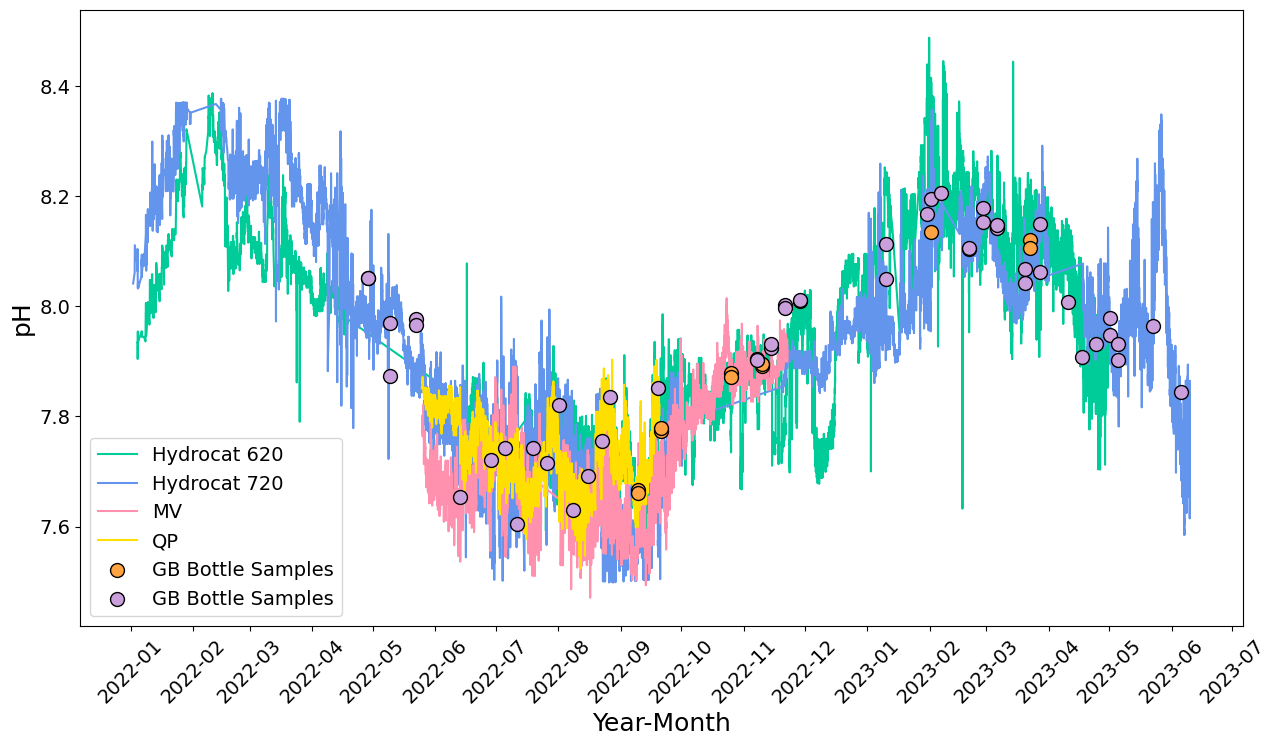

In [19]:
fig, ax = plt.subplots(figsize = [15,8])

df = hydrocat620
x = 'DateTime'
y = 'pH final'
ax.plot(df[x], df[y], color = clr_hydro620, label = 'Hydrocat 620')

df = hydrocat720
ax.plot(df[x], df[y], color = clr_hydro720, label = 'Hydrocat 720')

df = MV
ax.plot(df[x], df[y], color = clr_MV, label = 'MV')

df = QP
ax.plot(df[x], df[y], color = clr_QP, label = 'QP')

ax.scatter(labGB['DateTime'], labGB['pH'], facecolors = clr_GB, edgecolors = 'k',
           label = 'GB Bottle Samples', zorder = 3, s = 100)
ax.scatter(labPLT['DateTime'], labPLT['pH'], facecolors = clr_PLT, edgecolors = 'k',
           label = 'GB Bottle Samples', zorder = 3, s = 100)

ax.legend()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.tick_params('x',labelsize = 14, labelrotation = 45)
ax.tick_params('y',labelsize = 14)
ax.legend(fontsize = 14)
ax.set_xlabel('Year-Month', fontsize = 18)
ax.set_ylabel('pH', fontsize = 18)

# pH monthly averages

In [129]:
hydrocat620['Month'] = np.zeros(len(hydrocat620['DateTime']))
hydrocat720['Month'] = np.zeros(len(hydrocat720['DateTime']))
MV['Month'] = np.zeros(len(MV['DateTime']))
QP['Month'] = np.zeros(len(QP['DateTime']))
for ind in hydrocat620.index:
    hydrocat620['Month'][ind] = hydrocat620['DateTime'][ind].month
for ind in hydrocat720.index:
    hydrocat720['Month'][ind] = hydrocat720['DateTime'][ind].month
for ind in MV.index:
    MV['Month'][ind] = MV['DateTime'][ind].month
for ind in QP.index:
    QP['Month'][ind] = QP['DateTime'][ind].month
MV

,DateTime,Temperature [degC],Salinity [PSU],DO [mg/L],raw pH [total],pH final,pH (normalized to 15°C),Month
0,2022-05-25 12:15:00,18.498,29.29,8.52,7.780182,7.780182,7.832411,5.0
1,2022-05-25 12:30:00,18.452,29.36,8.42,7.770350,7.770350,7.821772,5.0
2,2022-05-25 12:45:00,18.399,29.39,8.52,7.780484,7.780484,7.831264,5.0
3,2022-05-25 13:00:00,18.376,29.42,8.50,7.790562,7.790562,7.841136,5.0
4,2022-05-25 13:15:00,18.230,29.48,8.49,7.780906,7.780906,7.829201,5.0
...,...,...,...,...,...,...,...,...
16505,2022-11-22 10:30:00,8.814,29.99,9.09,7.908946,7.908946,7.810475,11.0
16506,2022-11-22 10:45:00,8.680,29.95,9.19,7.919123,7.919123,7.818272,11.0
16507,2022-11-22 11:00:00,8.646,29.94,9.21,7.919168,7.919168,7.817762,11.0
16508,2022-11-22 11:15:00,8.582,29.91,9.23,7.919234,7.919234,7.816785,11.0


In [130]:
mn = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}
std = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}

for m in hydrocat720['Month'].unique():
    M620 = hydrocat620.where(hydrocat620['Month']==m).dropna().mean()
    STD620 = hydrocat620.where(hydrocat620['Month']==m).dropna().std(ddof=1)
    
    M720 = hydrocat720.where(hydrocat720['Month']==m).dropna().mean()
    STD720 = hydrocat720.where(hydrocat720['Month']==m).dropna().std(ddof=1)
    
    Mmv = MV.where(MV['Month']==m).dropna().mean()
    STDmv = MV.where(MV['Month']==m).dropna().std(ddof=1)
    
    Mqp = QP.where(QP['Month']==m).dropna().mean()
    STDqp = QP.where(QP['Month']==m).dropna().std(ddof=1)
    
    mn['Hydrocat 620'].append(M620['pH final'])
    mn['Hydrocat 720'].append(M720['pH final'])
    mn['QP'].append(Mqp['pH final'])
    mn['MV'].append(Mmv['pH final'])
    
    std['Hydrocat 620'].append(STD620['pH final'])
    std['Hydrocat 720'].append(STD720['pH final'])
    std['QP'].append(STDqp['pH final'])
    std['MV'].append(STDmv['pH final'])

In [37]:
pH_mn = pd.DataFrame(mn)
pH_std = pd.DataFrame(std)

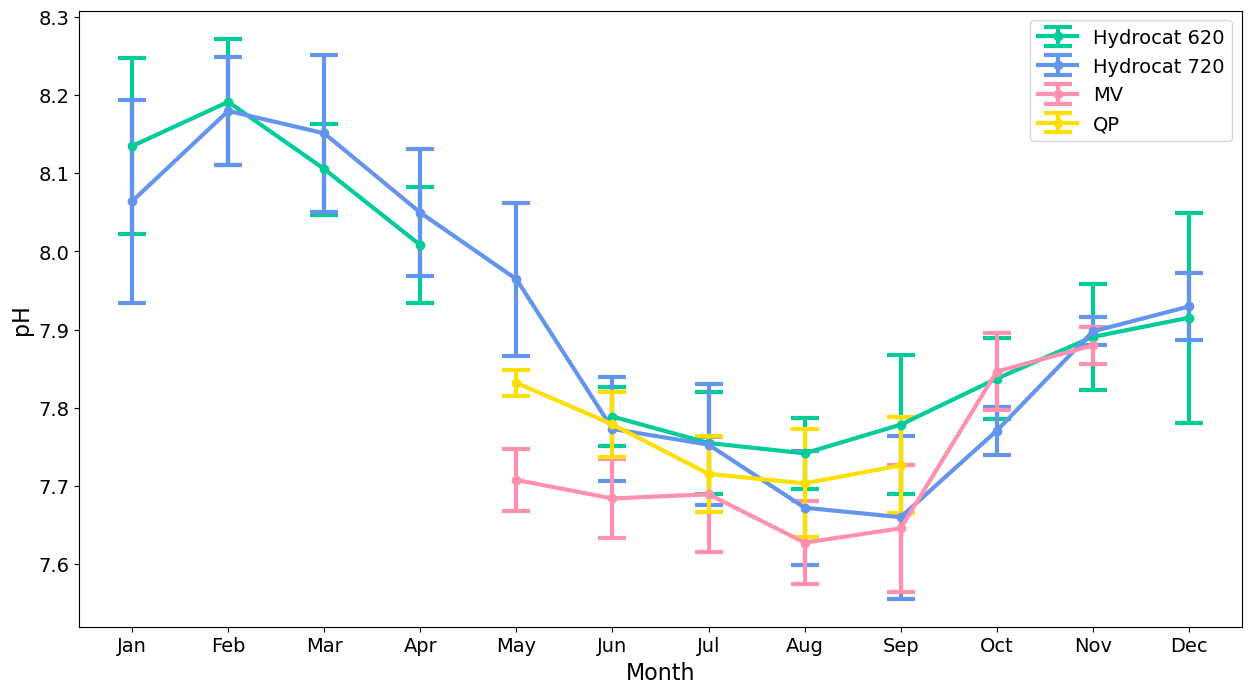

In [211]:
fig, ax = plt.subplots(figsize = [15,8])
months = np.arange(1,13,1)

d = 'Hydrocat 620'
ax.errorbar(months, pH_mn[d], yerr = pH_std[d], lw = 3,
           color = clr_hydro620, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'Hydrocat 720'
ax.errorbar(months, pH_mn[d], yerr = pH_std[d], lw = 3,
           color = clr_hydro720, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'MV'
ax.errorbar(months, pH_mn[d], yerr = pH_std[d], lw = 3,
           color = clr_MV, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'QP'
ax.errorbar(months, pH_mn[d], yerr = pH_std[d], lw = 3, 
           color = clr_QP, marker = 'o', capsize = 10, capthick = 3, label = d)

ax.set_xticks(months)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize = 14)
ax.tick_params('y',labelsize = 14)
ax.set_ylabel('pH', fontsize = 16)
ax.set_xlabel('Month', fontsize = 16)
ax.legend(fontsize = 14)

fig.savefig('/Users/akbaskind/Documents/Python Scripts/phyto/monthly_ph.png', bbox_inches='tight')


# pH seasonal average

In [62]:
hydrocat620['Season'] = np.zeros(len(hydrocat620['Month']))
hydrocat720['Season'] = np.zeros(len(hydrocat720['Month']))
MV['Season'] = np.zeros(len(MV['Month']))
QP['Season'] = np.zeros(len(QP['Month']))
for ind in hydrocat620.index:
    if hydrocat620['Month'][ind] == 12 or hydrocat620['Month'][ind] == 1 or hydrocat620['Month'][ind] == 2:
        hydrocat620['Season'][ind] = 'DJF'
    elif hydrocat620['Month'][ind] == 3 or hydrocat620['Month'][ind] == 4 or hydrocat620['Month'][ind] == 5:
        hydrocat620['Season'][ind] = 'MAM'
    elif hydrocat620['Month'][ind] == 6 or hydrocat620['Month'][ind] == 7 or hydrocat620['Month'][ind] == 8:
        hydrocat620['Season'][ind] = 'JJA'
    else:
        hydrocat620['Season'][ind] = 'SON'
        
for ind in hydrocat720.index:
    if hydrocat720['Month'][ind] == 12 or hydrocat720['Month'][ind] == 1 or hydrocat720['Month'][ind] == 2:
        hydrocat720['Season'][ind] = 'DJF'
    elif hydrocat720['Month'][ind] == 3 or hydrocat720['Month'][ind] == 4 or hydrocat720['Month'][ind] == 5:
        hydrocat720['Season'][ind] = 'MAM'
    elif hydrocat720['Month'][ind] == 6 or hydrocat720['Month'][ind] == 7 or hydrocat720['Month'][ind] == 8:
        hydrocat720['Season'][ind] = 'JJA'
    else:
        hydrocat720['Season'][ind] = 'SON'
        
for ind in MV.index:
    if MV['Month'][ind] == 12 or MV['Month'][ind] == 1 or MV['Month'][ind] == 2:
        MV['Season'][ind] = 'DJF'
    elif MV['Month'][ind] == 3 or MV['Month'][ind] == 4 or MV['Month'][ind] == 5:
        MV['Season'][ind] = 'MAM'
    elif MV['Month'][ind] == 6 or MV['Month'][ind] == 7 or MV['Month'][ind] == 8:
        MV['Season'][ind] = 'JJA'
    else:
        MV['Season'][ind] = 'SON'
        
for ind in QP.index:
    if QP['Month'][ind] == 12 or QP['Month'][ind] == 1 or QP['Month'][ind] == 2:
        QP['Season'][ind] = 'DJF'
    elif QP['Month'][ind] == 3 or QP['Month'][ind] == 4 or QP['Month'][ind] == 5:
        QP['Season'][ind] = 'MAM'
    elif QP['Month'][ind] == 6 or QP['Month'][ind] == 7 or QP['Month'][ind] == 8:
        QP['Season'][ind] = 'JJA'
    else:
        QP['Season'][ind] = 'SON'

In [63]:
mn_s = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}
std_s = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}

for m in hydrocat720['Season'].unique():
    M620 = hydrocat620.where(hydrocat620['Season']==m).dropna().mean()
    STD620 = hydrocat620.where(hydrocat620['Season']==m).dropna().std(ddof=1)
    
    M720 = hydrocat720.where(hydrocat720['Season']==m).dropna().mean()
    STD720 = hydrocat720.where(hydrocat720['Season']==m).dropna().std(ddof=1)
    
    Mmv = MV.where(MV['Season']==m).dropna().mean()
    STDmv = MV.where(MV['Season']==m).dropna().std(ddof=1)
    
    Mqp = QP.where(QP['Season']==m).dropna().mean()
    STDqp = QP.where(QP['Season']==m).dropna().std(ddof=1)
    
    mn_s['Hydrocat 620'].append(M620['pH final'])
    mn_s['Hydrocat 720'].append(M720['pH final'])
    mn_s['QP'].append(Mqp['pH final'])
    mn_s['MV'].append(Mmv['pH final'])
    
    std_s['Hydrocat 620'].append(STD620['pH final'])
    std_s['Hydrocat 720'].append(STD720['pH final'])
    std_s['QP'].append(STDqp['pH final'])
    std_s['MV'].append(STDmv['pH final'])

In [64]:
pH_mn_s = pd.DataFrame(mn_s)
pH_std_s = pd.DataFrame(std_s)

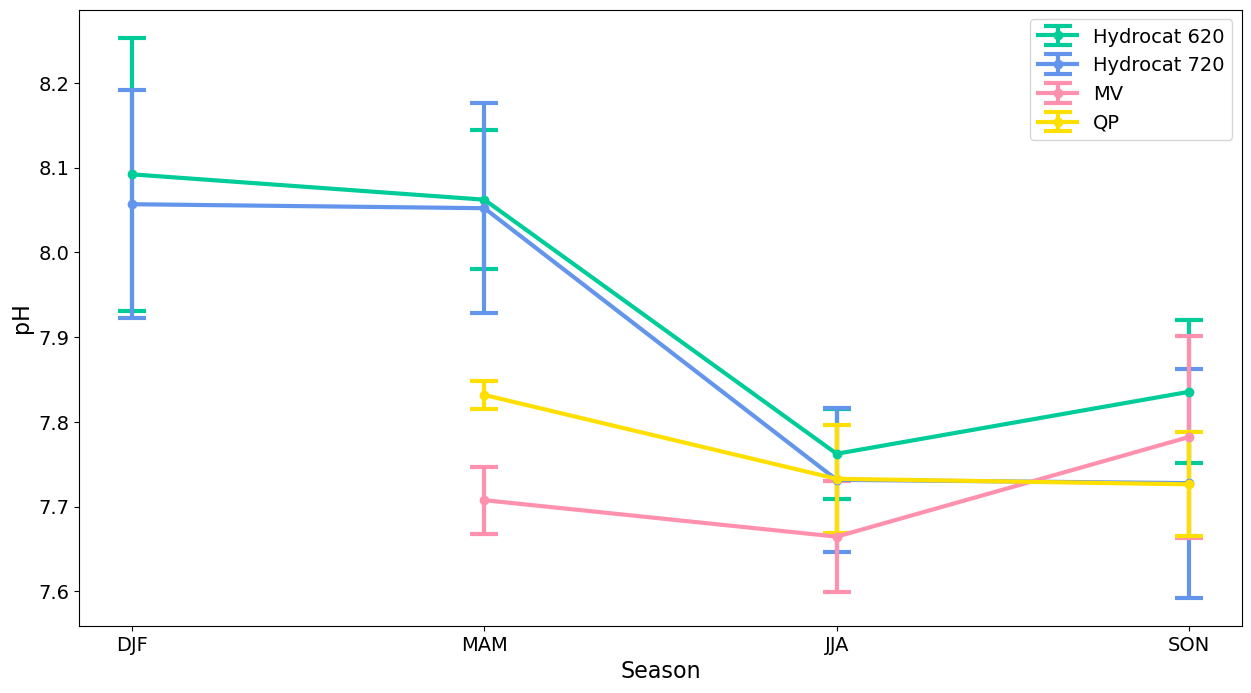

In [212]:
fig, ax = plt.subplots(figsize = [15,8])
months = np.arange(1,5,1)

d = 'Hydrocat 620'
ax.errorbar(months, pH_mn_s[d], yerr = pH_std_s[d], lw = 3,
           color = clr_hydro620, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'Hydrocat 720'
ax.errorbar(months, pH_mn_s[d], yerr = pH_std_s[d], lw = 3,
           color = clr_hydro720, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'MV'
ax.errorbar(months, pH_mn_s[d], yerr = pH_std_s[d], lw = 3,
           color = clr_MV, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'QP'
ax.errorbar(months, pH_mn_s[d], yerr = pH_std_s[d], lw = 3, 
           color = clr_QP, marker = 'o', capsize = 10, capthick = 3, label = d)

ax.set_xticks(months)
ax.set_xticklabels(['DJF','MAM','JJA','SON'], fontsize = 14)
ax.tick_params('y',labelsize = 14)
ax.set_ylabel('pH', fontsize = 16)
ax.set_xlabel('Season', fontsize = 16)
ax.legend(fontsize = 14)

fig.savefig('/Users/akbaskind/Documents/Python Scripts/phyto/seasonal_ph.png', bbox_inches='tight')

# DO month and seasonal average

In [78]:
mn = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}
std = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}

for m in hydrocat720['Month'].unique():
    M620 = hydrocat620.where(hydrocat620['Month']==m).dropna().mean()
    STD620 = hydrocat620.where(hydrocat620['Month']==m).dropna().std(ddof=1)
    
    M720 = hydrocat720.where(hydrocat720['Month']==m).dropna().mean()
    STD720 = hydrocat720.where(hydrocat720['Month']==m).dropna().std(ddof=1)
    
    Mmv = MV.where(MV['Month']==m).dropna().mean()
    STDmv = MV.where(MV['Month']==m).dropna().std(ddof=1)
    
    Mqp = QP.where(QP['Month']==m).dropna().mean()
    STDqp = QP.where(QP['Month']==m).dropna().std(ddof=1)
    
    var = 'DO [mg/L]'
    mn['Hydrocat 620'].append(M620[var])
    mn['Hydrocat 720'].append(M720[var])
    mn['QP'].append(Mqp[var])
    mn['MV'].append(Mmv[var])
    
    std['Hydrocat 620'].append(STD620[var])
    std['Hydrocat 720'].append(STD720[var])
    std['QP'].append(STDqp[var])
    std['MV'].append(STDmv[var])
    
DO_mn = pd.DataFrame(mn)
DO_std = pd.DataFrame(std)

In [79]:
mn_s = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}
std_s = {'Hydrocat 620': [], 'Hydrocat 720': [], 'QP': [], 'MV': []}

for m in hydrocat720['Season'].unique():
    M620 = hydrocat620.where(hydrocat620['Season']==m).dropna().mean()
    STD620 = hydrocat620.where(hydrocat620['Season']==m).dropna().std(ddof=1)
    
    M720 = hydrocat720.where(hydrocat720['Season']==m).dropna().mean()
    STD720 = hydrocat720.where(hydrocat720['Season']==m).dropna().std(ddof=1)
    
    Mmv = MV.where(MV['Season']==m).dropna().mean()
    STDmv = MV.where(MV['Season']==m).dropna().std(ddof=1)
    
    Mqp = QP.where(QP['Season']==m).dropna().mean()
    STDqp = QP.where(QP['Season']==m).dropna().std(ddof=1)
    
    var = 'DO [mg/L]'
    mn_s['Hydrocat 620'].append(M620[var])
    mn_s['Hydrocat 720'].append(M720[var])
    mn_s['QP'].append(Mqp[var])
    mn_s['MV'].append(Mmv[var])
    
    std_s['Hydrocat 620'].append(STD620[var])
    std_s['Hydrocat 720'].append(STD720[var])
    std_s['QP'].append(STDqp[var])
    std_s['MV'].append(STDmv[var])
    
DO_mn_s = pd.DataFrame(mn_s)
DO_std_s = pd.DataFrame(std_s)

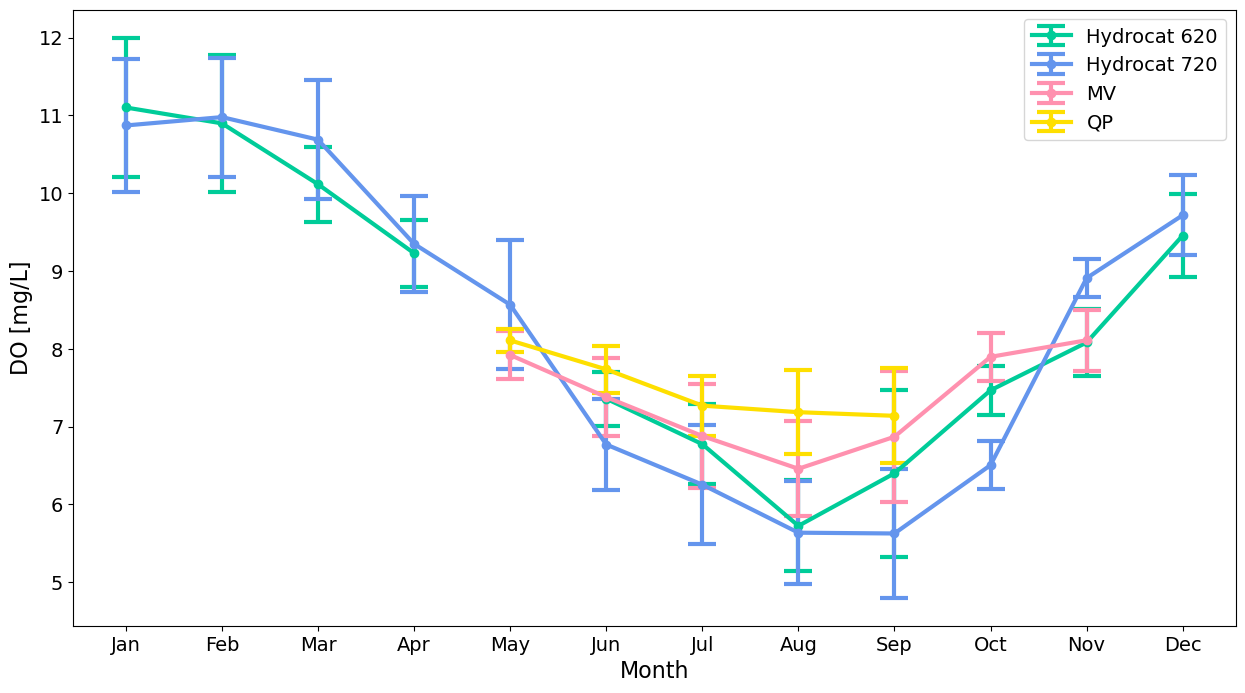

In [80]:
fig, ax = plt.subplots(figsize = [15,8])
months = np.arange(1,13,1)

d = 'Hydrocat 620'
ax.errorbar(months, DO_mn[d], yerr = DO_std[d], lw = 3,
           color = clr_hydro620, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'Hydrocat 720'
ax.errorbar(months, DO_mn[d], yerr = DO_std[d], lw = 3,
           color = clr_hydro720, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'MV'
ax.errorbar(months, DO_mn[d], yerr = DO_std[d], lw = 3,
           color = clr_MV, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'QP'
ax.errorbar(months, DO_mn[d], yerr = DO_std[d], lw = 3, 
           color = clr_QP, marker = 'o', capsize = 10, capthick = 3, label = d)

ax.set_xticks(months)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize = 14)
ax.tick_params('y',labelsize = 14)
ax.set_ylabel('DO [mg/L]', fontsize = 16)
ax.set_xlabel('Month', fontsize = 16)
ax.legend(fontsize = 14)

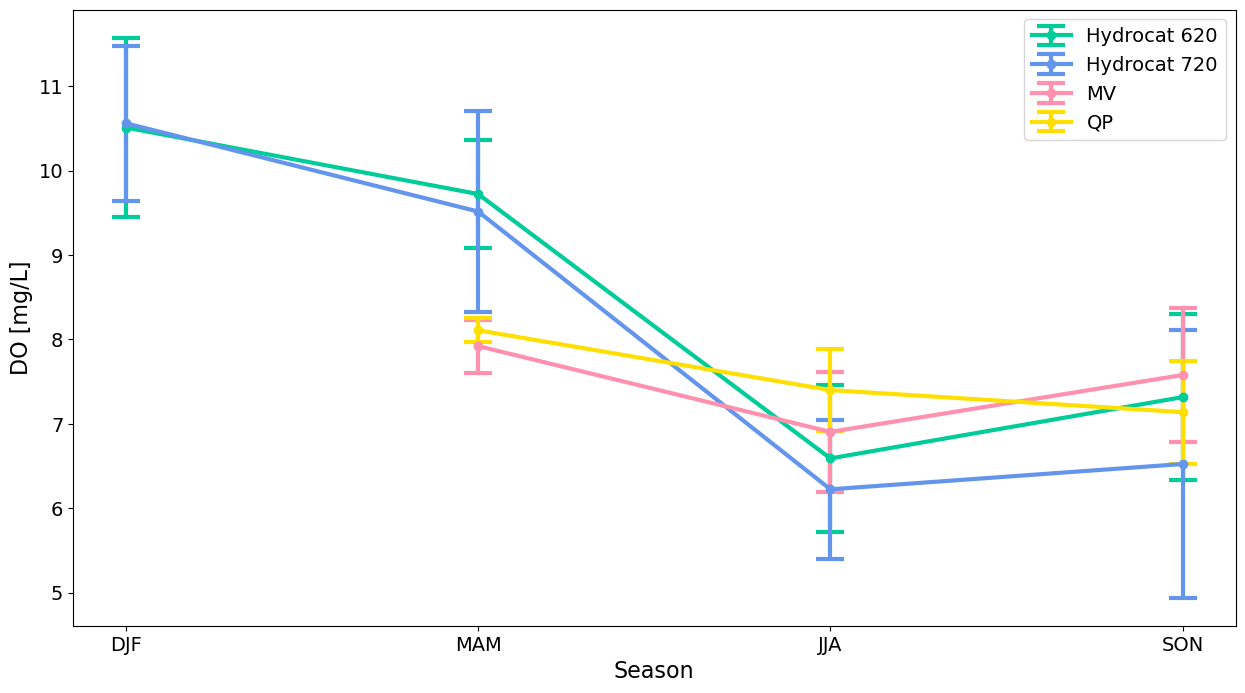

In [81]:
fig, ax = plt.subplots(figsize = [15,8])
months = np.arange(1,5,1)

d = 'Hydrocat 620'
ax.errorbar(months, DO_mn_s[d], yerr = DO_std_s[d], lw = 3,
           color = clr_hydro620, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'Hydrocat 720'
ax.errorbar(months, DO_mn_s[d], yerr = DO_std_s[d], lw = 3,
           color = clr_hydro720, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'MV'
ax.errorbar(months, DO_mn_s[d], yerr = DO_std_s[d], lw = 3,
           color = clr_MV, marker = 'o', capsize = 10, capthick = 3, label = d)

d = 'QP'
ax.errorbar(months, DO_mn_s[d], yerr = DO_std_s[d], lw = 3, 
           color = clr_QP, marker = 'o', capsize = 10, capthick = 3, label = d)

ax.set_xticks(months)
ax.set_xticklabels(['DJF','MAM','JJA','SON'], fontsize = 14)
ax.tick_params('y',labelsize = 14)
ax.set_ylabel('DO [mg/L]', fontsize = 16)
ax.set_xlabel('Season', fontsize = 16)
ax.legend(fontsize = 14)

# Decomposition

$$
\Delta [\text{H}^+] \approx \frac{\partial [\text{H}^+]}{\partial \text{T}} \Delta \text{T} 
+ \frac{\partial [\text{H}^+]}{\partial \text{S}} \Delta \text{S} 
+ \frac{\partial [\text{H}^+]}{\partial \text{TA}} \Delta \text{TA} 
+ \frac{\partial [\text{H}^+]}{\partial \text{DIC}} \Delta \text{DIC}_{\text{bio}} 
+ \frac{\partial [\text{H}^+]}{\partial \text{DIC}} \Delta \text{DIC}_{\text{flux}} 
+ \frac{\partial [\text{H}^+]}{\partial \text{DIC}} \Delta \text{DIC}_{\text{mix}} 
$$

Each term in this equations consists of (A) a partial derivative of H+ in terms of *variable* and (B) the discrete time change of *variable*.

## Step 1. Get monthly averages and calculate DIC, H+, etc.

In [206]:
mn = {'Month': [], 'Temperature [degC]': [], 'Salinity [PSU]': [], 'DO [mg/L]': [], 'pH final': []}
std = {'Month': [], 'Temperature [degC]': [], 'Salinity [PSU]': [], 'DO [mg/L]': [], 'pH final': []}

for m in hydrocat720['Month'].unique():
    M620 = hydrocat620.where(hydrocat620['Month']==m).dropna().mean()
    STD620 = hydrocat620.where(hydrocat620['Month']==m).dropna().std(ddof=1)
    
    var = 'Month'
    mn[var].append(M620[var])
    std[var].append(STD620[var])
    
    var = 'Temperature [degC]'
    mn[var].append(M620[var])
    std[var].append(STD620[var])
    
    var = 'Salinity [PSU]'
    mn[var].append(M620[var])
    std[var].append(STD620[var])
    
    var = 'DO [mg/L]'
    mn[var].append(M620[var])
    std[var].append(STD620[var])
    
    var = 'pH final'
    mn[var].append(M620[var])
    std[var].append(STD620[var])

H620 = pd.DataFrame(mn)
H620_std = pd.DataFrame(std)

TA = 477.62 + 51.99 * H620['Salinity [PSU]']
H620['Alkalinity [umol/kg]'] = TA
pH = H620['pH final']
S = H620['Salinity [PSU]']
T = H620['Temperature [degC]']

results = pyco2.sys(par1 = TA, par2 = pH, par1_type = 1, par2_type = 3, temperature = T, salinity = S,
                   uncertainty_into =["alkalinity", "dic","Hfree", 'pCO2'],
                   uncertainty_from ={"par2": 0.1, 'temperature': 0.05})

In [209]:
H620_std

,Month,Temperature [degC],Salinity [PSU],DO [mg/L],pH final
0,0.0,1.328622,1.555309,0.897046,0.112259
1,0.0,1.030470,1.266588,0.882830,0.080808
2,0.0,1.068522,0.851795,0.484626,0.058130
3,0.0,1.686763,0.689889,0.429888,0.074653
4,NaN,NaN,NaN,NaN,NaN
5,0.0,1.054299,0.245168,0.349375,0.038232
6,0.0,1.108206,0.192315,0.513479,0.065486
7,0.0,0.719691,0.096574,0.585219,0.045243
8,0.0,1.553454,0.472435,1.076954,0.089120
9,0.0,0.753263,0.590858,0.314454,0.051369


In [140]:
H620['H+ [umol/kg]'] = results['Hfree']
H620['DIC [umol/kg]'] = results['dic']
H620['pCO2 [ppm]'] = results['pCO2']
H620

,Month,Temperature [degC],Salinity [PSU],DO [mg/L],pH final,Alkalinity [umol/kg],H+ [umol/kg],DIC [umol/kg],pCO2 [ppm]
0,1.0,4.457275,28.767084,11.102695,8.134738,1973.220696,0.006569,1842.798889,296.874791
1,2.0,4.279595,28.781551,10.898679,8.191223,1973.972844,0.005772,1824.957896,256.660484
2,3.0,5.733192,28.818050,10.116106,8.105309,1975.870414,0.006989,1847.368681,318.752166
3,4.0,9.407323,29.086858,9.228955,8.008086,1989.845744,0.008585,1870.859220,406.588564
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,19.870675,30.388744,7.358862,7.788738,2057.530789,0.013338,1949.136590,731.637378
6,7.0,24.097148,30.803195,6.774081,7.754948,2079.078100,0.013981,1959.231265,814.707913
7,8.0,24.227186,31.197291,5.723571,7.741671,2099.567160,0.014382,1981.327735,849.132190
8,9.0,21.559271,30.792587,6.399515,7.778392,2078.526620,0.013487,1962.975250,760.199254
9,10.0,16.208051,30.592815,7.466730,7.837280,2068.140463,0.012205,1960.432568,644.313277


## Step 2. Calculate the finite differences and partial derivatives
### Step 2a. Partial derivatives
I re-solve the carbonate system using TA and calculated DIC. I take the gradient of H+ with respect to (i.e. *wrt*) `par1` (in this case, DIC), `par2` (in this case, TA), temperature, and salinity. I add those to my table.

In [156]:
TA = 477.62 + 51.99 * H620['Salinity [PSU]']
pH = H620['pH final']
S = H620['Salinity [PSU]']
T = H620['Temperature [degC]']
DIC = H620['DIC [umol/kg]']

# Re-solve carb system using TA and DIC (total)
results = pyco2.sys(par1 = DIC, par2 = TA, par1_type = 2, par2_type = 1, temperature = T, salinity = S,
                    # Take grad of H+
                    grads_of=["Hfree"],
                    # In terms of par1 (which is DIC)
                    grads_wrt=["par1", 'temperature', 'salinity', 'par2'])

H620['∂H/∂DIC'] = results['d_Hfree__d_par1']
H620['∂H/∂TA'] = results['d_Hfree__d_par2']
H620['∂H/∂T'] = results['d_Hfree__d_temperature']
H620['∂H/∂S'] = results['d_Hfree__d_salinity']

### Step 2b. Finite differences
I use `np.diff()` to do this. It is the difference in a variable over out time step.

In [158]:
H620['∆DIC'] = H620['DIC [umol/kg]'].diff()
H620['∆TA'] = H620['Alkalinity [umol/kg]'].diff()
H620['∆T'] = H620['Temperature [degC]'].diff()
H620['∆S'] = H620['Salinity [PSU]'].diff()

## Step 2. DIC mixing 
### Step 2a. Calculate ∆DIC mixing
We estimated this using the relationship between DIC and salinity from Pimenta et al. (2023). This says for every 1 PSU increase in salinity, DIC increases by 50.59 umol/kg.

$$
\text{DIC}_{\text{mix}} = 397.65 + 50.59 \times \text{S}
$$

In [203]:
(H620['Salinity [PSU]'] * 50.59)

0     1455.326779
1     1456.058672
2     1457.905144
3     1471.504143
4             NaN
5     1537.366547
6     1558.333627
7     1578.270953
8     1557.796998
9     1547.690522
10    1537.387158
11    1498.384698
Name: Salinity [PSU], dtype: float64

In [179]:
H620['∆DIC_mix'] = (H620['Salinity [PSU]'] * 50.59).diff()
H620

,Month,Temperature [degC],Salinity [PSU],DO [mg/L],pH final,Alkalinity [umol/kg],H+ [umol/kg],DIC [umol/kg],pCO2 [ppm],∆DIC_mix,∂H/∂DIC,∂H/∂TA,∂H/∂T,∂H/∂S,∆DIC,∆TA,∆T,∆S,∆DIC_flux [umolC/L],DIC_flux [umolC/L]
0,1.0,4.457275,28.767084,11.102695,8.134738,1973.220696,0.006569,1842.798889,296.874791,NaN,0.000045,-0.000043,0.000242,0.000207,NaN,NaN,NaN,NaN,NaN,0.817120
1,2.0,4.279595,28.781551,10.898679,8.191223,1973.972844,0.005772,1824.957896,256.660484,0.731894,0.000037,-0.000035,0.000214,0.000186,-17.840994,0.752148,-0.177680,0.014467,0.291429,1.108549
2,3.0,5.733192,28.818050,10.116106,8.105309,1975.870414,0.006989,1847.368681,318.752166,1.846472,0.000048,-0.000046,0.000251,0.000218,22.410786,1.897571,1.453597,0.036499,-0.453954,0.654595
3,4.0,9.407323,29.086858,9.228955,8.008086,1989.845744,0.008585,1870.859220,406.588564,13.598999,0.000060,-0.000058,0.000287,0.000255,23.490539,13.975330,3.674131,0.268808,-0.630571,0.024024
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,19.870675,30.388744,7.358862,7.788738,2057.530789,0.013338,1949.136590,731.637378,NaN,0.000092,-0.000089,0.000355,0.000348,NaN,NaN,NaN,NaN,NaN,-2.163443
6,7.0,24.097148,30.803195,6.774081,7.754948,2079.078100,0.013981,1959.231265,814.707913,20.967080,0.000091,-0.000087,0.000342,0.000356,10.094675,21.547311,4.226473,0.414451,-0.526929,-2.690372
7,8.0,24.227186,31.197291,5.723571,7.741671,2099.567160,0.014382,1981.327735,849.132190,19.937326,0.000093,-0.000089,0.000349,0.000361,22.096469,20.489061,0.130038,0.394096,-0.222275,-2.912647
8,9.0,21.559271,30.792587,6.399515,7.778392,2078.526620,0.013487,1962.975250,760.199254,-20.473955,0.000089,-0.000086,0.000347,0.000348,-18.352485,-21.040540,-2.667915,-0.404704,0.572703,-2.339943
9,10.0,16.208051,30.592815,7.466730,7.837280,2068.140463,0.012205,1960.432568,644.313277,-10.106476,0.000085,-0.000082,0.000351,0.000325,-2.542682,-10.386157,-5.351220,-0.199772,0.746853,-1.593090


### Step 2b. Calculate ∆DIC_ASF
First, we calculate the air-sea flux of CO2. Functions are provided and yield units of molC/m2/yr. Ultimately, we want units of umol/kg/month, so we convert.

To get ∆DIC_ASF, we simply differentiate.

In [168]:
def co2flux(pco2_sea, pco2_air, sst, sss, wspd):
    """
    Inputs
        - pCO2_sea [uatm] or [ppm]
        - pCO2_air [uatm] or [ppm]
        - SST [°C]
        - SSS [PSU]
        - wind speed [m/s?]
    Output
        - CO2 upward flux [molC/m2/yr] 
    """
    kt = gas_transfer_velocity(sst,wspd)
    K0 = K0_Weiss(sst,sss)
    dpco2 = pco2_sea - pco2_air
    co2_flux = kt * K0 * dpco2 * (24*365/100000) # Because kt is in cm/hour, pCO2 is in µatm, flux in most case is in mol C/m2/yr
    return co2_flux

def K0_Weiss(sst,sss):
    sst = sst + 273.15 # transfer to Kelvin degree
    A1 =-58.0931
    A2 = 90.5069
    A3 = 22.294
    B1 = 0.027766
    B2 = -0.025888
    B3 = 0.0050578
    ln_K0 = A1 + A2 * (100/sst) + A3 * np.log(sst/100) + sss * (B1 + B2 * (sst/100) + B3 * (sst/100)**2)
    K0 = np.exp(ln_K0)
    return K0

def gas_transfer_velocity(sst,wspd):
    A = 2116.8 
    B = -136.25
    C = 4.7353
    D = -0.092307
    E = 0.000755
    c = 0.251
    Sc = A + B*(sst) + C*(sst**2) + D*(sst**3) + E*(sst**4) # Jähne et al. (1987), Wanninkhof 2014
    kt = c * wspd**2 *((Sc/660)**(-0.5)) # unit: cm/hour
    return kt

In [181]:
# molC/m2/yr
fgco2_ann = co2flux(H620['pCO2 [ppm]'], 410, H620['Temperature [degC]'], H620['Salinity [PSU]'], 3)
# molC/m2/month
fgco2_month = fgco2_ann/12
MLD = 9
# Density [kg/m3]
rho = gsw.rho(H620['Salinity [PSU]'].to_numpy(), H620['Temperature [degC]'].to_numpy(), np.zeros(len(H620)))
# umolC/kg
H620['DIC_flux [umolC/L]'] = -(fgco2_month/MLD)*(1e6)/rho
H620['∆DIC_flux [umolC/L]'] = H620['DIC_flux [umolC/L]'].diff()
H620

,Month,Temperature [degC],Salinity [PSU],DO [mg/L],pH final,Alkalinity [umol/kg],H+ [umol/kg],DIC [umol/kg],pCO2 [ppm],∆DIC_mix,∂H/∂DIC,∂H/∂TA,∂H/∂T,∂H/∂S,∆DIC,∆TA,∆T,∆S,∆DIC_flux [umolC/L],DIC_flux [umolC/L]
0,1.0,4.457275,28.767084,11.102695,8.134738,1973.220696,0.006569,1842.798889,296.874791,NaN,0.000045,-0.000043,0.000242,0.000207,NaN,NaN,NaN,NaN,NaN,7.354078
1,2.0,4.279595,28.781551,10.898679,8.191223,1973.972844,0.005772,1824.957896,256.660484,0.731894,0.000037,-0.000035,0.000214,0.000186,-17.840994,0.752148,-0.177680,0.014467,2.622861,9.976939
2,3.0,5.733192,28.818050,10.116106,8.105309,1975.870414,0.006989,1847.368681,318.752166,1.846472,0.000048,-0.000046,0.000251,0.000218,22.410786,1.897571,1.453597,0.036499,-4.085583,5.891356
3,4.0,9.407323,29.086858,9.228955,8.008086,1989.845744,0.008585,1870.859220,406.588564,13.598999,0.000060,-0.000058,0.000287,0.000255,23.490539,13.975330,3.674131,0.268808,-5.675137,0.216219
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,19.870675,30.388744,7.358862,7.788738,2057.530789,0.013338,1949.136590,731.637378,NaN,0.000092,-0.000089,0.000355,0.000348,NaN,NaN,NaN,NaN,NaN,-19.470985
6,7.0,24.097148,30.803195,6.774081,7.754948,2079.078100,0.013981,1959.231265,814.707913,20.967080,0.000091,-0.000087,0.000342,0.000356,10.094675,21.547311,4.226473,0.414451,-4.742359,-24.213344
7,8.0,24.227186,31.197291,5.723571,7.741671,2099.567160,0.014382,1981.327735,849.132190,19.937326,0.000093,-0.000089,0.000349,0.000361,22.096469,20.489061,0.130038,0.394096,-2.000475,-26.213819
8,9.0,21.559271,30.792587,6.399515,7.778392,2078.526620,0.013487,1962.975250,760.199254,-20.473955,0.000089,-0.000086,0.000347,0.000348,-18.352485,-21.040540,-2.667915,-0.404704,5.154329,-21.059490
9,10.0,16.208051,30.592815,7.466730,7.837280,2068.140463,0.012205,1960.432568,644.313277,-10.106476,0.000085,-0.000082,0.000351,0.000325,-2.542682,-10.386157,-5.351220,-0.199772,6.721679,-14.337811


### Step 2c. ∆DIC_bio

In [183]:
H620['∆DIC_bio [umolC/L]'] = H620['∆DIC'] - H620['∆DIC_flux [umolC/L]'] - H620['∆DIC_mix']

$$
\Delta [\text{H}^+] \approx \frac{\partial [\text{H}^+]}{\partial \text{T}} \Delta \text{T} 
+ \frac{\partial [\text{H}^+]}{\partial \text{S}} \Delta \text{S} 
+ \frac{\partial [\text{H}^+]}{\partial \text{TA}} \Delta \text{TA} 
+ \frac{\partial [\text{H}^+]}{\partial \text{DIC}} \Delta \text{DIC}_{\text{bio}} 
+ \frac{\partial [\text{H}^+]}{\partial \text{DIC}} \Delta \text{DIC}_{\text{flux}} 
+ \frac{\partial [\text{H}^+]}{\partial \text{DIC}} \Delta \text{DIC}_{\text{mix}} 
$$

In [185]:
H620['Month'][4] = 5
H620['Month'][4]

5.0

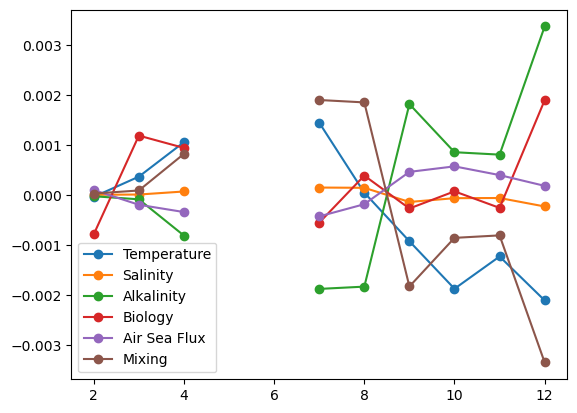

In [201]:
fig, ax = plt.subplots()

temp = H620['∂H/∂T'] * H620['∆T']
ax.plot(H620['Month'], temp, marker = 'o', label = 'Temperature')

sal = H620['∂H/∂S'] * H620['∆S']
ax.plot(H620['Month'], sal, marker = 'o', label = 'Salinity')

alk = H620['∂H/∂TA'] * H620['∆TA']
ax.plot(H620['Month'], alk, marker = 'o', label = 'Alkalinity')

bio = H620['∂H/∂DIC'] * H620['∆DIC_bio [umolC/L]']
ax.plot(H620['Month'], bio, marker = 'o', label = 'Biology')

ASF = H620['∂H/∂DIC'] * H620['∆DIC_flux [umolC/L]']
ax.plot(H620['Month'], ASF, marker = 'o', label = 'Air Sea Flux')

mix = H620['∂H/∂DIC'] * H620['∆DIC_mix']
ax.plot(H620['Month'], mix, marker = 'o', label = 'Mixing')

ax.legend()

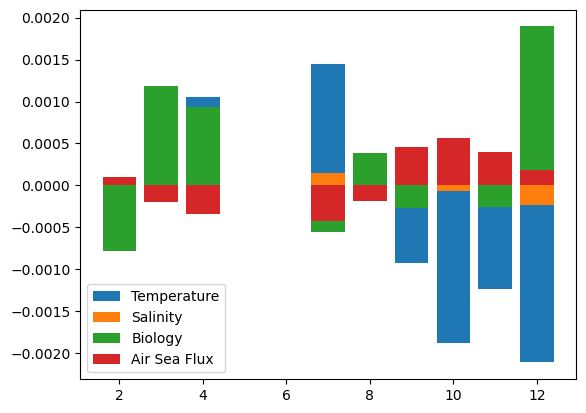

In [204]:
fig, ax = plt.subplots()

temp = H620['∂H/∂T'] * H620['∆T']
ax.bar(H620['Month'], temp, label = 'Temperature')

sal = H620['∂H/∂S'] * H620['∆S']
ax.bar(H620['Month'], sal, label = 'Salinity')

# alk = H620['∂H/∂TA'] * H620['∆TA']
# ax.bar(H620['Month'], alk, label = 'Alkalinity')

bio = H620['∂H/∂DIC'] * H620['∆DIC_bio [umolC/L]']
ax.bar(H620['Month'], bio, label = 'Biology')

ASF = H620['∂H/∂DIC'] * H620['∆DIC_flux [umolC/L]']
ax.bar(H620['Month'], ASF, label = 'Air Sea Flux')

# mix = H620['∂H/∂DIC'] * H620['∆DIC_mix']
# ax.bar(H620['Month'], mix, label = 'Mixing')

ax.legend()

In [126]:
r = pyco2.sys(par1 = 477, par2 = 397, par1_type = 1, par2_type = 2, temperature = 5, salinity = 0,
                   grads_of=["alkalinity", "Hfree"], grads_wrt=["salinity", "temperature"])

In [125]:
r['pCO2']

47.437700031619556